### Column Transformer
- https://www.youtube.com/watch?v=5TVj6iEBR4I
- Instead of doing multiple steps to encode different data in multiple steps, we use column transformer
- 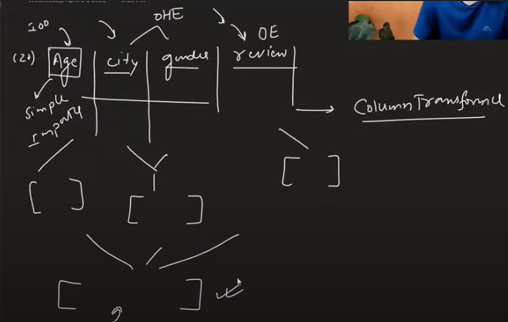

In [89]:
# Import data to understand the problem first.

import pandas as pd
import numpy as np

covid_toy_df = pd.read_csv(r"C:\Users\ACER\Desktop\Kranthi\DataScience_Desktop\MachineLearningFiles\covid_toy.csv")
covid_toy_df.head(3)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No


In [91]:
# Overview of the data

print("Category wise counts in Cough ",covid_toy_df.cough.value_counts())
print("Category wise counts in City ",covid_toy_df.city.value_counts())

Category wise counts in Cough  cough
Mild      62
Strong    38
Name: count, dtype: int64
Category wise counts in City  city
Kolkata      32
Bangalore    30
Delhi        22
Mumbai       16
Name: count, dtype: int64


In [93]:
# Check if there are null values in any of the columns

covid_toy_df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

#### Data types and any preprocessing required?

In [96]:
# age	- Numerical >>> We can do scaling, but not required in this example.
# gender - categorical, nominal >>> OneHot Encoding
# fever	- Numerical >>> Remove nulls >>> Simple Imputer
# cough	 - categorical, ordinal >>> Ordinal Encoding
# city	- categorical, nominal  >>> OneHot Encoding
# has_covid - categorical, nominal  >>> Label Encoding, but not required in this example

In [98]:
# Prepare the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(covid_toy_df.drop(columns=['has_covid']),covid_toy_df['has_covid'],test_size=0.2)

In [100]:
x_train.head(3)

,age,gender,fever,cough,city
28,16,Male,104.0,Mild,Kolkata
44,20,Male,102.0,Strong,Delhi
20,12,Male,98.0,Strong,Bangalore


### Preprocessing without using Column Transformer

In [103]:
# First replace nulls in fever column > Use simple Imputer > Replaces nulls with Mean value

from sklearn.impute import SimpleImputer

# Create simple imputer object
SimpleImputerObj = SimpleImputer()

# Impute the nulls in both x_train and x_test and store in new dataframes
x_train_fever = SimpleImputerObj.fit_transform(x_train[['fever']])
x_test_fever = SimpleImputerObj.fit_transform(x_test[['fever']])
x_train_fever

array([[104.        ],
       [102.        ],
       [ 98.        ],
       [101.        ],
       [ 99.        ],
       [104.        ],
       [104.        ],
       [104.        ],
       [ 98.        ],
       [101.        ],
       [100.90540541],
       [ 98.        ],
       [ 98.        ],
       [ 98.        ],
       [101.        ],
       [100.        ],
       [102.        ],
       [ 99.        ],
       [104.        ],
       [ 98.        ],
       [101.        ],
       [ 98.        ],
       [ 99.        ],
       [102.        ],
       [104.        ],
       [101.        ],
       [100.90540541],
       [102.        ],
       [100.        ],
       [100.90540541],
       [103.        ],
       [101.        ],
       [100.        ],
       [102.        ],
       [102.        ],
       [103.        ],
       [100.        ],
       [101.        ],
       [103.        ],
       [100.        ],
       [103.        ],
       [104.        ],
       [ 98.        ],
       [ 98

In [107]:
# Next apply ordinal encoding on Cough column

from sklearn.preprocessing import OrdinalEncoder

# Create Ordinal encoder object and mention the order
OrdinalEncoderObj = OrdinalEncoder(categories=[['Mild','Strong']])

# Fit and transform the column and store it in new variables
x_train_cough = OrdinalEncoderObj.fit_transform(x_train[['cough']])
x_test_cough = OrdinalEncoderObj.fit_transform(x_test[['cough']])
x_test_cough

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.]])

In [111]:
# To check the categories given in the encoding object

OrdinalEncoderObj.categories

[['Mild', 'Strong']]

In [113]:
# Next apply OneHotEncoder encoding on gender and city column

from sklearn.preprocessing import OneHotEncoder

# Create an object for class OneHotEncoder, mention drop='first' to perform k-1 dummy variables/columns.
OneHotEncoderObj = OneHotEncoder(drop='first',sparse_output=False)

# Now fit and transform, by mentioning the columns to be encoded.
# Since we need to encode gender(2dummy to 1dummy due to drop='first') and city(4dummy to 3dummy due to drop='first')
# After encoding we will have 1+3 columns
x_train_gender_city = OneHotEncoderObj.fit_transform(x_train[['gender','city']])
x_test_gender_city = OneHotEncoderObj.fit_transform(x_test[['gender','city']])

In [125]:
OneHotEncoderObj.categories

'auto'

In [115]:
x_train_gender_city.shape

(80, 4)

In [117]:
# Now lets get the columns where we do not need any transformation or encoding i.e. Age column

x_train_age = x_train.drop(columns=['gender','fever','cough','city'])
x_test_age = x_test.drop(columns=['gender','fever','cough','city'])

In [119]:
# Now just concatenate all the columns to make the final data to be sent for training the machine learning

x_train_transformed = np.concatenate((x_train_age,x_train_fever,x_train_gender_city,x_train_cough),axis=1)
x_test_transformed = np.concatenate((x_test_age,x_test_fever,x_test_gender_city,x_test_cough),axis=1)

# We will have a total of 7 columns
# age(1) + gender(2>1) + city(4>3) + fever(1) + cough(1) = 7

In [121]:
x_train_transformed.shape

(80, 7)

In [123]:
x_train_transformed

array([[ 16.        , 104.        ,   1.        ,   0.        ,
          1.        ,   0.        ,   0.        ],
       [ 20.        , 102.        ,   1.        ,   1.        ,
          0.        ,   0.        ,   1.        ],
       [ 12.        ,  98.        ,   1.        ,   0.        ,
          0.        ,   0.        ,   1.        ],
       [ 42.        , 101.        ,   1.        ,   1.        ,
          0.        ,   0.        ,   0.        ],
       [ 72.        ,  99.        ,   1.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [ 51.        , 104.        ,   1.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [ 34.        , 104.        ,   0.        ,   1.        ,
          0.        ,   0.        ,   1.        ],
       [ 56.        , 104.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.        ],
       [ 64.        ,  98.        ,   0.        ,   0.        ,
          0.    

### By Using Column Transformer

In [81]:
from sklearn.compose import ColumnTransformer

ColumnTransformerObj = ColumnTransformer(transformers=[
    ('trnsf1',SimpleImputer(),['fever']),
    ('trnsf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('trnsf3',OneHotEncoder(drop='first',sparse_output=False),['gender','city'])
],remainder='passthrough')

# transformers = List of transformations to be applied, for each transformation it expects a tuple with 3 values
# tuple = ('Transformation Name',Transformation(),['columns on which trans to be applied']
# remainder{‘drop’, ‘passthrough’} or estimator, default=’drop’
# By default, only the specified columns in transformers are transformed and combined in the output, and the non-specified columns are dropped. 
# (default of 'drop'). By specifying remainder='passthrough', all remaining columns that were not specified in transformers, 
# but present in the data passed to fit will be automatically passed through. 
    
# Here we pass 3 transformers, one for fever to replaces nulls, one for cough to set the order for ordinal encoder and the other transformation 
# is for gender & city for OneHotEncoder.
# remainder = 'passthrough' >>> No action taken on remaining columns, just pass to the output.
# Example, here we did not take any action or mention about age column, if remainder = 'passthrough', age column will be kept without any changes, else
# it will be dropped after fit_transform.

In [83]:
x_train_transformed = ColumnTransformerObj.fit_transform(x_train)
x_test_transformed = ColumnTransformerObj.transform(x_test)

In [85]:
x_train_transformed.shape

(80, 7)

In [87]:
x_train_transformed

array([[104.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  12.        ],
       [ 98.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   0.        ,  73.        ],
       [104.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   0.        ,  25.        ],
       [102.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  82.        ],
       [ 98.        ,   0.        ,   1.        ,   0.        ,
          1.        ,   0.        ,  24.        ],
       [100.90140845,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  42.        ],
       [ 98.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   1.        ,  69.        ],
       [104.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   6.        ],
       [102.        ,   1.        ,   0.        ,   0.        ,
          1.    